# Feed-forward сети

Итак, давайте потренируемся тренировать нейронные сети прямого распространения (так как делали на паре)
При этом попробуем создать свою функцию активации на одном из слоев

In [46]:
# Сделаем необходимые импорты
import torch
from torch import nn
from torchvision.datasets import CIFAR100
from torchvision.transforms import transforms
from torch.nn import functional as F
from torch.optim import SGD
import matplotlib.pyplot as plt

In [60]:
# Загрузим датасет CIFAR-100, сразу же создадим dataloader для него
# Если вам не хватает вычислительных ресурсов, то можно вернуться к CIFAR-10
dataset = CIFAR100(root='data/', 
                   train=True, 
                   download=True, 
                   transform=transforms.ToTensor())

test = CIFAR100(root='data/', 
                   train=False, 
                   download=True, 
                   transform=transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


In [65]:
img, label = dataset[0]

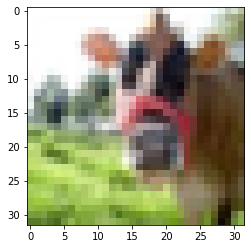

In [67]:
plt.imshow(img.permute(1, 2, 0).numpy())

In [68]:
train_loader = torch.utils.data.DataLoader(dataset=dataset,
                                     batch_size=64, 
                                     shuffle=True)

In [76]:
img.shape

torch.Size([3, 32, 32])

In [104]:
# Создайте собственную архитектуру! Можете использовать все, что угодно, но в ограничении на использование линейные слои 
# (пока без сверток)
# Давайте добавим ограниченный Leaky_relu, то есть output = max(0.1x, 0.5x)
# Ваша задача добавить его в архитектуру сети как функцию активации

class Net(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size*2)
        self.fc2 = nn.Linear(hidden_size*2, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        x = self.fc1(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc2(x)
        x = F.leaky_relu(x, 0.1)
        x = self.fc3(x)
        x = F.leaky_relu(x, 0.1)
        return x
        
    def predict(self, x):
        x = self.forward(x)
        x = F.softmax(x)
        return x
    
net = Net(input_size=3072, hidden_size=1024, output_size=100)

In [121]:
# Запустить обучение (по аналогии с тем, что делали на паре)
criterion = nn.CrossEntropyLoss()
optimizer = SGD(net.parameters(), lr=0.1, momentum=0.9)

In [122]:
net

Net(
  (fc1): Linear(in_features=3072, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=100, bias=True)
)

In [123]:
n_epoch = 2
for epoch in range(n_epoch):
    running_loss = 0
    for idx, batch in enumerate(train_loader):
        X, y = batch
        optimizer.zero_grad()
        pred = net(X)
        loss = criterion(pred, y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if idx % 100 == 0:
            print(f'epoch = {epoch}, batch = {idx}, loss = {running_loss}')
            running_loss = 0

epoch = 0, batch = 0, loss = 4.610041618347168
epoch = 0, batch = 100, loss = 453.4567060470581
epoch = 0, batch = 200, loss = 433.0424220561981
epoch = 0, batch = 300, loss = 427.0808401107788
epoch = 0, batch = 400, loss = 421.35875248908997
epoch = 0, batch = 500, loss = 419.48621678352356
epoch = 0, batch = 600, loss = 411.8182418346405
epoch = 0, batch = 700, loss = 412.4956212043762
epoch = 1, batch = 0, loss = 4.71286678314209
epoch = 1, batch = 100, loss = 406.419429063797
epoch = 1, batch = 200, loss = 407.45989775657654
epoch = 1, batch = 300, loss = 408.66586661338806
epoch = 1, batch = 400, loss = 405.81700134277344
epoch = 1, batch = 500, loss = 403.6962788105011
epoch = 1, batch = 600, loss = 403.88632440567017
epoch = 1, batch = 700, loss = 406.4465367794037
